In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sales = pd.DataFrame(
    {
        "temperature": [14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2], 
        "sales": [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408]
     }
)

In [3]:
sales

,temperature,sales
0,14.2,215
1,16.4,325
2,11.9,185
3,15.2,332
4,18.5,406
5,22.1,522
6,19.4,412
7,25.1,614
8,23.4,544
9,18.1,421


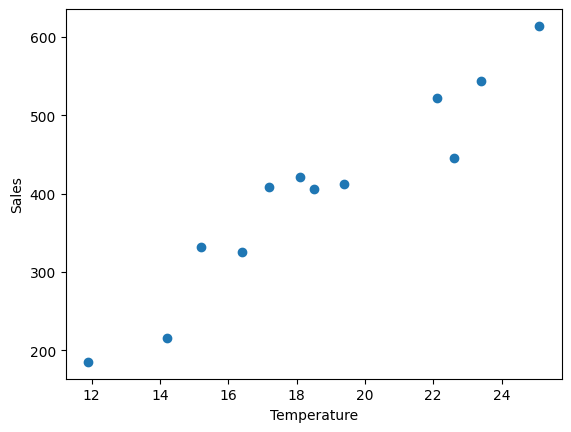

In [4]:
plt.figure()
plt.scatter(sales["temperature"], sales["sales"])
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.show()

In [6]:
sales.describe()

,temperature,sales
count,12.000000,12.000000
mean,18.675000,402.416667
std,4.011149,126.042892
min,11.900000,185.000000
25%,16.100000,330.250000
50%,18.300000,410.000000
75%,22.225000,464.250000
max,25.100000,614.000000


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression()

In [9]:
reg.fit(sales["temperature"], sales["sales"])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [12]:
reg.fit(sales[["temperature"]], sales["sales"])

LinearRegression()

In [14]:
print(type(sales))

<class 'pandas.core.frame.DataFrame'>


In [15]:
print(type(sales["temperature"]))

<class 'pandas.core.series.Series'>


In [16]:
print(sales["temperature"])

0     14.2
1     16.4
2     11.9
3     15.2
4     18.5
5     22.1
6     19.4
7     25.1
8     23.4
9     18.1
10    22.6
11    17.2
Name: temperature, dtype: float64


In [17]:
print(sales[["temperature"]])

    temperature
0          14.2
1          16.4
2          11.9
3          15.2
4          18.5
5          22.1
6          19.4
7          25.1
8          23.4
9          18.1
10         22.6
11         17.2


In [18]:
print(reg.coef_)

[30.08786179]


In [19]:
print(reg.intercept_)

-159.4741523408623


In [20]:
y_hat = reg.predict(sales[["temperature"]])

In [21]:
y_hat_new = reg.predict([[12.7], [27]])
print(y_hat_new)

[222.64169245 652.8981161 ]


/Users/taekholee/miniconda3/envs/dmclass/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
x = sales["temperature"].to_numpy()
y = sales["sales"].to_numpy()

In [25]:
print(x.shape)

(12,)


In [27]:
x_c = np.c_[np.ones(12), x]
print(x_c)

[[ 1.  14.2]
 [ 1.  16.4]
 [ 1.  11.9]
 [ 1.  15.2]
 [ 1.  18.5]
 [ 1.  22.1]
 [ 1.  19.4]
 [ 1.  25.1]
 [ 1.  23.4]
 [ 1.  18.1]
 [ 1.  22.6]
 [ 1.  17.2]]


In [28]:
print(x_c.shape)

(12, 2)


In [29]:
print(x_c.T.shape)

(2, 12)


In [30]:
xtx = np.matmul(x_c.T, x_c)
print(xtx.shape)

(2, 2)


In [31]:
inv_xtx = np.linalg.inv(xtx)
print(inv_xtx.shape)

(2, 2)


In [32]:
print(xtx)
print("-"*50)
print(inv_xtx)

[[  12.    224.1 ]
 [ 224.1  4362.05]]
--------------------------------------------------
[[ 2.05389893 -0.10551891]
 [-0.10551891  0.00565028]]


In [34]:
beta = np.matmul(inv_xtx, np.matmul(x_c.T, y))
print(beta)

[-159.47415234   30.08786179]


In [35]:
print(reg.coef_)

[30.08786179]


In [36]:
print(reg.intercept_)

-159.4741523408623


In [38]:
sst = np.sum((y - np.mean(y)) ** 2)
ssr = np.sum((y_hat - np.mean(y)) ** 2)
sse = np.sum((y - y_hat) ** 2)

In [39]:
print(sst)
print(ssr)
print(sse)
print(ssr + sse)

174754.9166666667
160218.61625090058
14536.300415766174
174754.91666666674


In [40]:
msr = ssr / 1
mse = sse / (12 - 1 - 1)

print(msr)
print(mse)

160218.61625090058
1453.6300415766175


In [41]:
f = msr / mse

In [48]:
from scipy import stats

In [44]:
x = np.linspace(0, 5, 100)
y = stats.f.pdf(x, 1, 10)
y2 = stats.f.cdf(x, 1, 10)

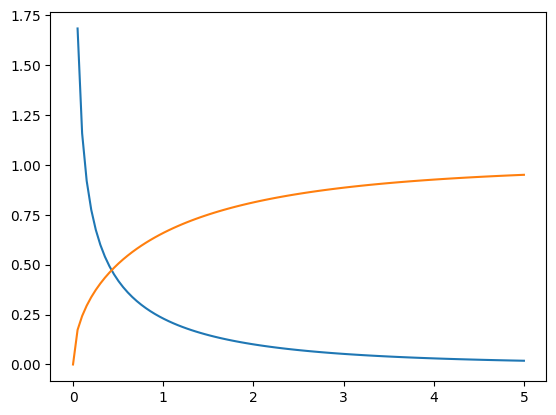

In [45]:
plt.figure()
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [43]:
alpha = 0.05
print(stats.f.ppf(1 - alpha, 1, 12 - 1 - 1))

4.9646027437307145


In [51]:
print(stats.f.ppf(1 - alpha, 1, 10))

4.9646027437307145


In [54]:
print(1 - stats.f.cdf(f, 1, 10))

1.0158925118908257e-06


In [53]:
print(f)

110.21966502365783
